<a href="https://colab.research.google.com/github/jonnie763/DATA-Science-601/blob/main/Week_7_visualizing_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment Content

Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour​



One bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.
Submit the .ipynb file containing the analysis and the generated pictures.​

Include the assignment description in a markdown cell at the top of your notebook.

https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand

In [77]:
import matplotlib.pyplot as plt        #Import relevant libraries. Pandas for dataframes and ploty and matplotlib for visualization. Other libraries just in case.  
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import datetime as dt
plt.rcParams['figure.figsize'] = 25, 12 #Increase general size for matplot.lib

# https://stackoverflow.com/questions/39662149/pandas-extract-date-and-time-from-timestamp

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [78]:
df_1 = pd.read_csv("/content/RollingSystemDemand_20210320_0332.csv") # Read csv using this code, print df
df_1                                                                 # Need two dataframes, will append one later one 

,HDR,ROLLING SYSTEM DEMAND
VD,20210301000000,27035.0
VD,20210301000500,27069.0
VD,20210301001000,27109.0
VD,20210301001500,27197.0
VD,20210301002000,27248.0
...,...,...
VD,20210307222000,31228.0
VD,20210307222500,30989.0
VD,20210307223000,30704.0
VD,20210307223500,30572.0


In [79]:
df_1=df_1.drop(["FTR"])                        # Need to drop as datetime will not work, without dropping FTR
df_1                                           #"Print" first dataframe 

,HDR,ROLLING SYSTEM DEMAND
VD,20210301000000,27035.0
VD,20210301000500,27069.0
VD,20210301001000,27109.0
VD,20210301001500,27197.0
VD,20210301002000,27248.0
...,...,...
VD,20210307221500,31407.0
VD,20210307222000,31228.0
VD,20210307222500,30989.0
VD,20210307223000,30704.0


In [80]:
df_2 = pd.read_csv("/content/RollingSystemDemand_20210320_0341.csv") # Read csv using this code, print df
df_2                                                                 #"Print" second dataframe 

,HDR,ROLLING SYSTEM DEMAND
VD,20210308000000,27599.0
VD,20210308000500,27838.0
VD,20210308001000,27885.0
VD,20210308001500,27885.0
VD,20210308002000,27750.0
...,...,...
VD,20210310234000,23968.0
VD,20210310234500,23882.0
VD,20210310235000,23722.0
VD,20210310235500,23664.0


In [81]:
df_2=df_2.drop(["FTR"]) # Need to drop as datetime will not work, without dropping FTR
df_2

,HDR,ROLLING SYSTEM DEMAND
VD,20210308000000,27599.0
VD,20210308000500,27838.0
VD,20210308001000,27885.0
VD,20210308001500,27885.0
VD,20210308002000,27750.0
...,...,...
VD,20210310233500,24051.0
VD,20210310234000,23968.0
VD,20210310234500,23882.0
VD,20210310235000,23722.0


In [82]:
df_3=df_1.append(df_2) # This puts one on top of the other 
df_3

,HDR,ROLLING SYSTEM DEMAND
VD,20210301000000,27035.0
VD,20210301000500,27069.0
VD,20210301001000,27109.0
VD,20210301001500,27197.0
VD,20210301002000,27248.0
...,...,...
VD,20210310233500,24051.0
VD,20210310234000,23968.0
VD,20210310234500,23882.0
VD,20210310235000,23722.0


In [83]:
df_3['HDR']=df_3['HDR'].astype('str') # Aides in creating the format below 

In [84]:
df_3['HDR']=pd.to_datetime(df_3['HDR'],format='%Y%m%d%H%M%S') # Import datetime then it reformats the HDR to where it can be grouped 
df_3

,HDR,ROLLING SYSTEM DEMAND
VD,2021-03-01 00:00:00,27035.0
VD,2021-03-01 00:05:00,27069.0
VD,2021-03-01 00:10:00,27109.0
VD,2021-03-01 00:15:00,27197.0
VD,2021-03-01 00:20:00,27248.0
...,...,...
VD,2021-03-10 23:35:00,24051.0
VD,2021-03-10 23:40:00,23968.0
VD,2021-03-10 23:45:00,23882.0
VD,2021-03-10 23:50:00,23722.0


In [85]:
LIST_1=[]                   # Create a list 

for i in df_3["HDR"]:       # Loop the dataframe, of hours 
    LIST_1.append(i.hour)   # This creates hours list 

df_3["Hour"]=LIST_1         # Create a variable 

HOUR_AVG=df_3.groupby("Hour")["ROLLING SYSTEM DEMAND"].mean() # Group the hours, and average them 

HOUR_AVG                                                      # Print hours, average 0 hours= first hour of all days, 1 hours= second hour of all days, etc...

Hour
0     28272.075000
1     28160.466667
2     27534.000000
3     27073.475000
4     26786.225000
5     27086.058333
6     29534.925000
7     33331.933333
8     35667.575000
9     36491.133333
10    36474.408333
11    36254.600000
12    36578.341667
13    36023.191667
14    35588.258333
15    36021.275000
16    37826.291667
17    40225.108333
18    41555.108333
19    39941.525000
20    37430.300000
21    34352.733333
22    31102.629310
23    28476.527778
Name: ROLLING SYSTEM DEMAND, dtype: float64

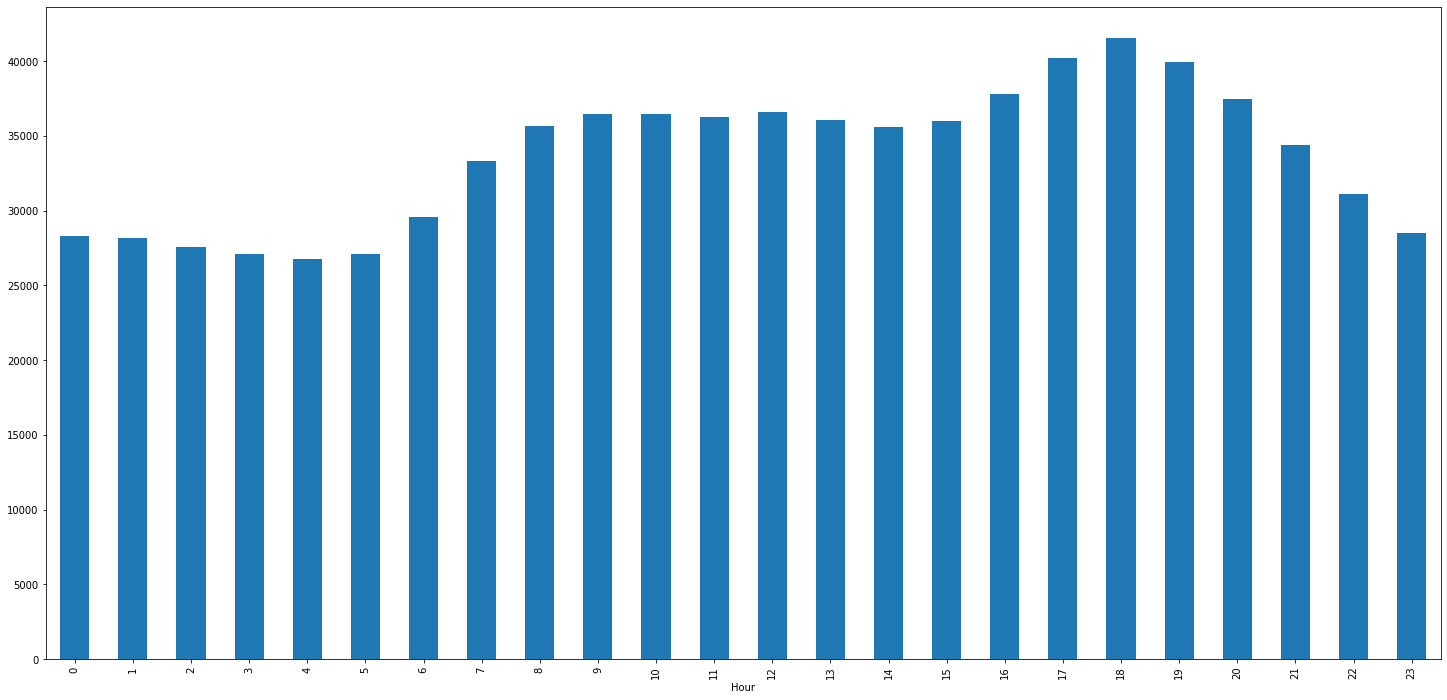

In [86]:
HOUR_AVG.plot(kind='bar',x='LOCATION',y='Value') # Visualization of the data set above this 

In [87]:
LIST_2=[]                   # Tried the same thing 

for i in df_3["HDR"]:       # This creates a list that is incomprehensible, and one that I cannot work with, am unsure where to go from here 
    LIST_2.append(i.date)   

print(LIST_2)               # 

[<built-in method date of Timestamp object at 0x7fb40ee1d050>, <built-in method date of Timestamp object at 0x7fb40ee1d0d0>, <built-in method date of Timestamp object at 0x7fb40ee1d150>, <built-in method date of Timestamp object at 0x7fb40ee1d1d0>, <built-in method date of Timestamp object at 0x7fb40ee1d250>, <built-in method date of Timestamp object at 0x7fb40ee1d2d0>, <built-in method date of Timestamp object at 0x7fb40ee1dcd0>, <built-in method date of Timestamp object at 0x7fb40ee1dc50>, <built-in method date of Timestamp object at 0x7fb40ee1d750>, <built-in method date of Timestamp object at 0x7fb40ee1db50>, <built-in method date of Timestamp object at 0x7fb40ee1dad0>, <built-in method date of Timestamp object at 0x7fb40ee1da50>, <built-in method date of Timestamp object at 0x7fb40ee1d4d0>, <built-in method date of Timestamp object at 0x7fb40ee1d550>, <built-in method date of Timestamp object at 0x7fb40ee1d5d0>, <built-in method date of Timestamp object at 0x7fb40ee1d650>, <built-

In [ ]:
df_3["date"]=LIST_2                                           # Create a variable 

date_AVG=df_3.groupby("date")["ROLLING SYSTEM DEMAND"].mean() # Group the date, and average them, but since the list is not as clean as the first list it will not work 

date_AVG                                                      # Print date, attempt (failed), cannot group the list presented above 

## Notes on second graph: As stated before, the first half of the assignment is done, the groupby function grouped the hours and found the mean. The data was cleansed and appended to make way for the grouping of the averages 0 hours= first hour of all days, 1 hours= second hour of all days, etc....

## As far as the second part of the assignment, I could not format the date to make way for the grouping which would both give me the mean and allow me to the visualize the data.  Once this part is formated correctly, one can start the last two parts of the assignment which would be mean and visualization of the 240 bars of data. 